<a href="https://colab.research.google.com/github/salmaannissa/PCVK_28_Salma/blob/main/Week8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **28. Salma Annissa Azizi (2141720137) / TI-3F**

## **PRAKTIKUM**

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [105]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

3. Membuat fungsi Dilasi pada citra dengan SED berbentuk cross 3x3 tanpa menggunakan library morphology dari openCV

In [106]:
def dilasi_citra(F, w):
  p,q = F.shape
  imgD = np.zeros((p,q), dtype=np.uint8)
  SED = np.ones((w,w),dtype=np.uint8)
  constant1 = (w-1)//2

  for i in range(constant1, p-constant1):
    for j in range(constant1, q-constant1):
      temp = F[i-constant1:i+constant1+1,j-constant1:j+constant1+1]
      product = temp*SED
      imgD[i,j] = np.max(product)

  return imgD

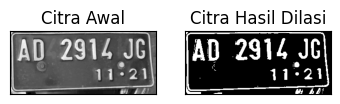

In [107]:
img_d = cv2.imread('/content/drive/MyDrive/PCVK/dataset/plat.PNG', 0)
ret, thresh = cv2.threshold(img_d, 125, 200, cv2.THRESH_BINARY)
w = 2
imgD = dilasi_citra(thresh, w)

plt.subplot(131),plt.imshow(img_d, cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgD, cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]), plt.yticks([])
plt.show()

4. Membuat fungsi Dilasi pada citra dengan SED berbentuk cross 3x3 dengan menggunakan library morphology dari openCV

[[1 1 1]
 [1 1 1]
 [1 1 1]]


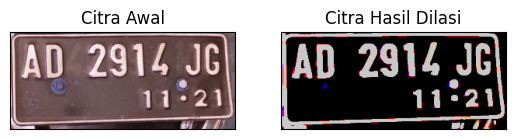

In [130]:
img = cv2.imread('/content/drive/MyDrive/PCVK/dataset/plat.PNG')
ret, thresh = cv2.threshold(img, 165, 200, cv2.THRESH_BINARY)
kernel = np.ones((3,3),np.uint16)
dilasi = cv2.dilate(thresh, kernel, iterations = 1)
print(kernel)

plt.subplot(121),plt.imshow(img),plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dilasi),plt.title('Citra Hasil Dilasi')
plt.xticks([]), plt.yticks([])
plt.show()

5. Membuat fungsi erosi dengan SE berbentuk square 5x5 tanpa menggunakan library morphology

In [114]:
def erosi_citra(F,k):
  m, n = F.shape

  SE = np.ones((k,k), dtype=np.uint8)
  constant = (k-1)//2

  imgE = np.zeros((m,n), dtype=np.uint8)

  for i in range(constant, m-constant):
    for j in range(constant, n-constant):
      temp = F[i-constant:i+constant+1, j-constant:j+constant+1]
      product = temp*SE
      imgE[i,j] = np.min(product)

  return imgE

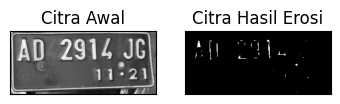

In [122]:
img_e= cv2.imread('/content/drive/MyDrive/PCVK/dataset/plat.PNG',0)
ret1, thresh1 = cv2.threshold(img_e, 175, 225,cv2.THRESH_BINARY)
k=5
imgE = erosi_citra(thresh1,k)

plt.subplot(131),plt.imshow(img_e,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgE,cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]),
plt.yticks([])
plt.show()

6. Membuat fungsi erosi dengan SE berbentuk square 5x5 dengan menggunakan library morphology

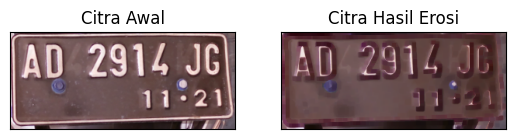

In [126]:
img = cv2.imread('/content/drive/MyDrive/PCVK/dataset/plat.PNG')

kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(img,kernel,iterations = 1)
plt.subplot(121),plt.imshow(img),plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(erosion),plt.title('Citra Hasil Erosi')
plt.xticks([]), plt.yticks([])
plt.show()

7. Membuat program implementasi operasi opening dengan Structuring Element
berbentuk square 3 x 3 tanpa dan dengan menggunakan library morphology dari
openCV

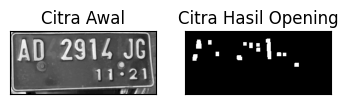

In [127]:
# tanpa library
img_o= cv2.imread('/content/drive/MyDrive/PCVK/dataset/plat.PNG',0)
reto, thresho = cv2.threshold(img_o, 127, 225,cv2.THRESH_BINARY)
k = 7
imgO = dilasi_citra(erosi_citra(thresho,k),k)

plt.subplot(131),plt.imshow(img_o,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgO,cmap = 'gray')
plt.title('Citra Hasil Opening'), plt.xticks([]), plt.yticks([])
plt.show()

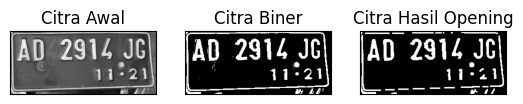

In [128]:
# menggunakan library
img = cv2.imread('/content/drive/MyDrive/PCVK/dataset/plat.PNG',0)
ret, thresh = cv2.threshold(img, 127, 225, cv2.THRESH_BINARY)
kernel = np.ones((3,3),np.uint8)
openn = cv2.morphologyEx(thresh,cv2.MORPH_OPEN, kernel)

plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(thresh,cmap = 'gray')
plt.title('Citra Biner'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(openn,cmap = 'gray')
plt.title('Citra Hasil Opening'), plt.xticks([]),
plt.yticks([])

plt.show()

8. Membuat program implementasi operasi closing dengan Structuring Element berbentuk square 3 x 3 tanpa dan dengan menggunakan library morphology dari openCV

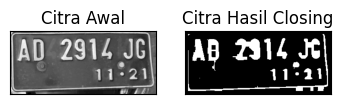

In [132]:
# tanpa library
img_c = cv2.imread('/content/drive/MyDrive/PCVK/dataset/plat.PNG',0)
retc, threshc = cv2.threshold(img_c, 127, 225, cv2.THRESH_BINARY)
k=7
imgC = erosi_citra(dilasi_citra(threshc,k),k)

plt.subplot(131),plt.imshow(img_c,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgC,cmap = 'gray')
plt.title('Citra Hasil Closing'), plt.xticks([]),
plt.yticks([])
plt.show()

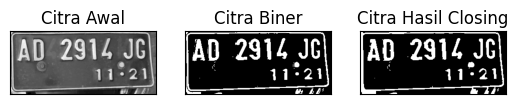

In [133]:
img = cv2.imread('/content/drive/MyDrive/PCVK/dataset/plat.PNG',0)
ret, thresh = cv2.threshold(img, 127, 225, cv2.THRESH_BINARY)
kernel = np.ones((3,3),np.uint8)
closs = cv2.morphologyEx(thresh,cv2.MORPH_CLOSE, kernel)

plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(thresh,cmap = 'gray')
plt.title('Citra Biner'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(closs,cmap = 'gray')
plt.title('Citra Hasil Closing'), plt.xticks([]), plt.yticks([])

plt.show()

9. Membuat program implementasi operasi dilasi dengan Structuring Element berbentuk
Cross 3 x 3  dan 5 x 5

SED=Cross3


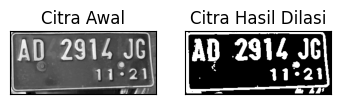

SED = Cross 5


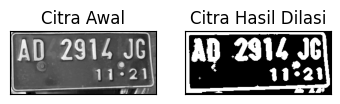

In [136]:
# dilasi cross sed
def dilasi_citra(F,w):
  #size image
  p,q= F.shape

  imgD= np.zeros((p,q), dtype=np.uint8)
  #Generate structure element dilasi (SED)
  # SED= np.ones((w,w), dtype=np.uint8)
  SED = np.array([[0, 1, 0],
                [1, 1, 1],
                [0, 1, 0]], dtype = np.uint8)
  constant1= (w-1)//2

  #Proses Dilasi
  for i in range(constant1, p-constant1):
    for j in range(constant1,q-constant1):
      temp= F[i-constant1:i+constant1+1,j-constant1:j+constant1+1]
      product=temp*SED
      imgD[i,j]=np.max(product)
  return imgD

print('SED=Cross3')
img_d=cv2.imread('/content/drive/MyDrive/PCVK/dataset/plat.PNG',0)
ret,thresh = cv2.threshold(img_d, 127, 225,cv2.THRESH_BINARY)
w=3
imgD=dilasi_citra(thresh,w)

plt.subplot(131),plt.imshow(img_d,cmap='gray')
plt.title('Citra Awal'),plt.xticks([]),plt.yticks([])
plt.subplot(132),plt.imshow(imgD,cmap='gray')
plt.title('Citra Hasil Dilasi'),plt.xticks([]),plt.yticks([])
plt.show()

def dilasi_citra(F,w):
  #size image
  p,q= F.shape

  imgD= np.zeros((p,q), dtype=np.uint8)

  #Generate structure element dilasi (SED)
  # SED= np.ones((w,w), dtype=np.uint8)
  SED = np.array([[0, 0, 1, 0, 0],
                [0, 0, 1, 0, 0],
                [1, 1, 1, 1, 1],
                [0, 0, 1, 0, 0],
                [0, 0, 1, 0, 0]], dtype = np.uint8)
  constant1= (w-1)//2

  #Proses Dilasi
  for i in range(constant1, p-constant1):
    for j in range(constant1,q-constant1):
      temp= F[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
      product= temp*SED
      imgD[i,j]= np.max(product)
  return imgD
print('SED = Cross 5')
img_d= cv2.imread('/content/drive/MyDrive/PCVK/dataset/plat.PNG',0)
ret, thresh = cv2.threshold(img_d, 127, 225, cv2.THRESH_BINARY)
w=5
imgD = dilasi_citra(thresh,w)

plt.subplot(131),plt.imshow(img_d,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgD,cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]),
plt.yticks([])
plt.show()

10. Membuat program implementasi operasi dilasi dengan Structuring Element berbentuk Circular 3 x 3  dan 5 x 5

SED = Circle 3


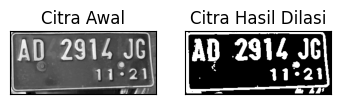

SED = Circle 5


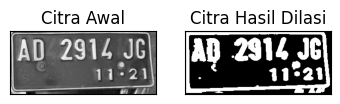

In [139]:
def dilasi_citra(F,w):
  #size image
  p,q= F.shape

  imgD= np.zeros((p,q), dtype=np.uint8)

  #Generate structure element dilasi (SED)
  SED= cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(w,w))
  constant1= (w-1)//2

  #Proses Dilasi
  for i in range(constant1, p-constant1):
    for j in range(constant1,q-constant1):
      temp= F[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
      product= temp*SED
      imgD[i,j]= np.max(product)
  return imgD

print('SED = Circle 3')
img_d= cv2.imread('/content/drive/MyDrive/PCVK/dataset/plat.PNG',0)
ret, thresh = cv2.threshold(img_d, 127, 225,cv2.THRESH_BINARY)
w=3
imgD = dilasi_citra(thresh,w)

plt.subplot(131),plt.imshow(img_d,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgD,cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]),
plt.yticks([])
plt.show()

print('SED = Circle 5')
img_d= cv2.imread('/content/drive/MyDrive/PCVK/dataset/plat.PNG',0)
ret, thresh = cv2.threshold(img_d, 127, 225,cv2.THRESH_BINARY)
w=5
imgD = dilasi_citra(thresh,w)

plt.subplot(131),plt.imshow(img_d,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgD,cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]),
plt.yticks([])
plt.show()

11. Membuat program implementasi operasi erosi dengan Structuring Element berbentuk Rectangle 3 x 5  dan 5 x 7

SE = Rectangle 3x5


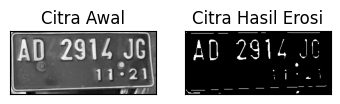

SE = Rectangle 5x7


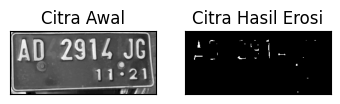

In [141]:
def erosi_citra(F,p,l):
  #size image
  m,n= F.shape

  #Generate structure element erosi (SE)
  SE = cv2.getStructuringElement(cv2.MORPH_RECT,(p,l)) #SE persegi panjang
  constant1= (l-1)//2
  constant2= (p-1)//2
  # print(SE)
  imgE= np.zeros((m,n), dtype=np.uint8)

  #Proses Erosi
  for i in range(constant1, m-constant1):
    for j in range(constant2,n-constant2):
      temp= F[i-constant1:i+constant1+1, j-constant2:j+constant2+1]
      product= temp*SE
      imgE[i,j]= np.min(product)

  return imgE
print('SE = Rectangle 3x5')
img_e= cv2.imread('/content/drive/MyDrive/PCVK/dataset/plat.PNG',0) #
ret1, thresh1 = cv2.threshold(img_e, 127, 225, cv2.THRESH_BINARY)
p=5
l=3
imgE = erosi_citra(thresh1,p,l)

plt.subplot(131),plt.imshow(img_e,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgE,cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])
plt.show()

print('SE = Rectangle 5x7')
img_e= cv2.imread('/content/drive/MyDrive/PCVK/dataset/plat.PNG',0) #
ret1, thresh1 = cv2.threshold(img_e, 127, 225, cv2.THRESH_BINARY)
p=7
l=5
imgE = erosi_citra(thresh1,p,l)

plt.subplot(131),plt.imshow(img_e,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgE,cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])
plt.show()

12. Membuat program implementasi operasi erosi dengan Structuring Element berbentuk Line Vertikal 3 dan 5, sehingga menghasilkan tampilan seperti di bawah ini:

SE = Line Vertikal 3


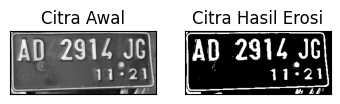

SE = Line Vertikal 5


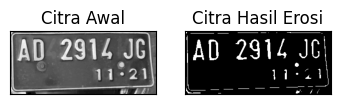

In [158]:
#Erosi Line Vertikal SE

def erosi_citra(F,k):
  #size image
  m,n= F.shape

  #Generate structure element erosi (SE)
  SE = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(1,k)) #SE line vertikal
  constant= (k-1)//2

  imgE= np.zeros((m,n), dtype=np.uint8)
  #Proses Erosi
  for i in range(constant, m-constant):
    for j in range(constant,n-constant):
      temp= F[i-constant:i+constant+1, j-constant:j+constant+1]
      product=temp*SE
      imgE[i,j]=np.min(product)
  return imgE

print('SE = Line Vertikal 3')
img_e= cv2.imread('/content/drive/MyDrive/PCVK/dataset/plat.PNG',0) #
ret1, thresh1 = cv2.threshold(img_e, 127, 225,cv2.THRESH_BINARY)
k=1
imgE = erosi_citra(thresh1,k)

plt.subplot(131),plt.imshow(img_e,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgE,cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]),
plt.yticks([])
plt.show()

print('SE = Line Vertikal 5')
img_e= cv2.imread('/content/drive/MyDrive/PCVK/dataset/plat.PNG',0) #
ret1, thresh1 = cv2.threshold(img_e, 127, 225,cv2.THRESH_BINARY)
k=3
imgE = erosi_citra(thresh1,k)

plt.subplot(131),plt.imshow(img_e,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgE,cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]),
plt.yticks([])
plt.show()